# Descarga de librerias y csv

In [108]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [110]:
pd.set_option('display.float_format', '{:.6f}'.format)



In [116]:
tabla=pd.read_csv('tablaentera.csv')

In [118]:
tabla

,indice_tiempo,pib_precios_corrientes,pib_precios_2004,tcn_pesos_dolares,pib_dolares_precios_corrientes,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,indice_precios_constantes,expectativa_inflacion_mediana,expectativa_inflacion_promedio,icg_nivel_general,evaluacion_general,interes_general,eficiencia,honestidad,capacidad,Riesgo país,Reservas_BCRA_millones
0,2007-01-01,774387.787841,576846.885699,3.096036,250122.351121,39335520.424390,19686.730453,6358.689256,121.465254,10.000000,13.763961,2.621915,2.813333,1.966667,2.253333,2.560000,3.516667,218.890000,32124
1,2007-04-01,904350.388093,674620.563006,3.082519,293380.346566,39437562.705194,22931.193666,7439.109479,141.685667,15.000000,15.441638,2.148999,2.160000,1.540000,1.756667,2.343333,2.943333,204.970000,36849
2,2007-07-01,914103.967402,610425.694015,3.137225,291373.379907,39539869.699085,23118.537678,7369.103189,127.871566,15.000000,20.898196,1.917331,1.810000,1.606667,1.600000,2.290000,2.620000,320.000000,43313
3,2007-10-01,995078.552951,625876.867864,3.145864,316313.284266,39642442.092770,25101.343419,7979.157377,130.769033,20.000000,25.225441,1.900817,1.863333,1.286667,1.470000,2.243333,2.633333,395.000000,42774
4,2008-01-01,1032356.873259,616720.357064,3.152572,327464.949353,39745280.574735,25974.325966,8239.090141,128.522489,20.000000,22.504985,2.068976,1.946667,1.360000,1.576667,2.450000,3.020000,410.000000,46292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-10-01,282103476.054208,696292.254849,446.752258,631453.946230,46757504.916269,6033330.404592,13504.868306,123.343608,100.000000,115.900000,1.830000,1.250000,1.936667,1.533333,2.266667,2.163333,2600.000000,26634
68,2024-01-01,418191840.950850,668672.713865,834.312456,501241.277080,46860655.890342,8924156.800738,10696.420431,118.190250,150.000000,230.000000,2.580000,2.256667,2.393333,2.416667,2.690000,3.153333,1906.000000,23470
69,2024-04-01,555062158.195852,720760.480106,885.913922,626541.861941,46964034.424108,11818877.253674,13340.886694,127.116515,70.000000,98.500000,2.473333,2.070000,2.130000,2.400000,2.846667,2.923333,1439.000000,27882
70,2024-07-01,635535679.664302,708557.001375,942.728261,674145.144517,47067641.019582,13502603.187610,14322.900615,124.689181,50.000000,80.600000,2.356667,2.026667,2.003333,2.220000,2.656667,2.880000,1513.000000,29615


In [120]:
tabla.to_csv('tablachat.csv', index=False)

# Predicción de indice de confianza general (y=indice de confianza general)

## Modelo 1 (Tipo de cambio)

In [123]:
y=tabla[["icg_nivel_general"]]
x=tabla[["tcn_pesos_dolares"]]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:      icg_nivel_general   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.706
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.198
Time:                        20:39:10   Log-Likelihood:                -35.190
No. Observations:                  50   AIC:                             74.38
Df Residuals:                      48   BIC:                             78.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9217      0.07

## Modelo 2 (Tipo de cambio + exp infl. promedio)

In [128]:
y=tabla[["icg_nivel_general"]]
x=tabla[["tcn_pesos_dolares","expectativa_inflacion_promedio"]]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:      icg_nivel_general   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.055
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.139
Time:                        20:39:11   Log-Likelihood:                -33.968
No. Observations:                  50   AIC:                             73.94
Df Residuals:                      47   BIC:                             79.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Modelo 3 (Tipo de cambio + exp infl. promedio + Reservas BCRA)

In [133]:
y=tabla[["icg_nivel_general"]]
x=tabla[["tcn_pesos_dolares","expectativa_inflacion_promedio","Reservas_BCRA_millones"]]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:      icg_nivel_general   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.402
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.254
Time:                        20:39:11   Log-Likelihood:                -33.875
No. Observations:                  50   AIC:                             75.75
Df Residuals:                      46   BIC:                             83.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Modelo 4 (Tipo de cambio + exp infl. promedio + Reservas BCRA + Riesgo país)

In [138]:
y=tabla[["icg_nivel_general"]]
x=tabla[["tcn_pesos_dolares","expectativa_inflacion_promedio","Reservas_BCRA_millones","Riesgo país"]]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:      icg_nivel_general   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.650
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.178
Time:                        20:39:12   Log-Likelihood:                -32.642
No. Observations:                  50   AIC:                             75.28
Df Residuals:                      45   BIC:                             84.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Modelo 5 (Tipo de cambio + exp infl. promedio + Reservas BCRA + Riesgo país + PBI per capita dolares corrientes)

In [144]:
y=tabla[["icg_nivel_general"]]
x=tabla[["tcn_pesos_dolares","expectativa_inflacion_promedio","Reservas_BCRA_millones","Riesgo país","pib_per_capita_dolares_corrientes"]]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:      icg_nivel_general   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.292
Date:                Tue, 03 Jun 2025   Prob (F-statistic):              0.285
Time:                        20:39:13   Log-Likelihood:                -32.639
No. Observations:                  50   AIC:                             77.28
Df Residuals:                      44   BIC:                             88.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Arbol de decisión para indice de confianza general (icg)

Error Cuadrático Medio: 0.19


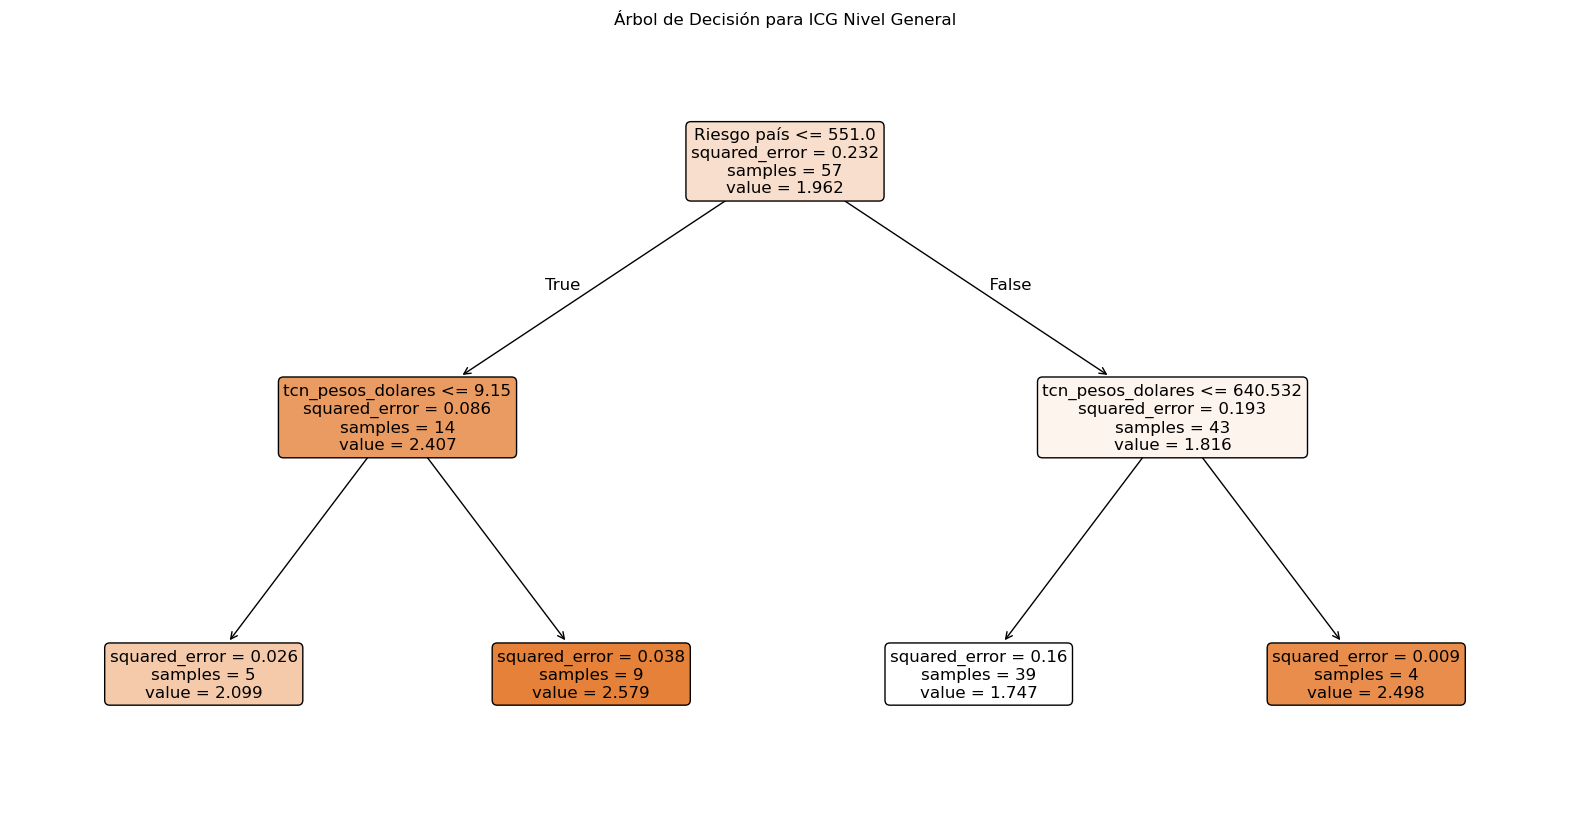

In [181]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Asumiendo que 'tabla' es tu DataFrame
# Definir variables
X = tabla[["tcn_pesos_dolares", "expectativa_inflacion_promedio", 
           "Reservas_BCRA_millones", "Riesgo país"]]
y = tabla["icg_nivel_general"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
# Puedes ajustar los parámetros como max_depth, min_samples_split, etc.
modelo_arbol = DecisionTreeRegressor(max_depth=2, random_state=42)
modelo_arbol.fit(X_train, y_train)

# Evaluar el modelo
predicciones = modelo_arbol.predict(X_test)
mse = mean_squared_error(y_test, predicciones)
print(f"Error Cuadrático Medio: {mse:.2f}")

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, 
          feature_names=X.columns.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Árbol de Decisión para ICG Nivel General")
plt.show()

# Opcional: Exportar a gráfico más profesional (requiere graphviz)
# from sklearn.tree import export_graphviz
# import graphviz

# dot_data = export_graphviz(modelo_arbol, out_file=None, 
#                          feature_names=X.columns,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("arbol_decision_icg")  # Esto crea un archivo PDF

### Análisis de icg en el tiempo, comparación con riesgo país

In [185]:
ejey=tabla[["icg_nivel_general"]]
ejex=tabla[["indice_tiempo"]]

C:\Users\Juan T\AppData\Local\Temp\ipykernel_12540\414703980.py:21: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45)


<Figure size 640x480 with 0 Axes>

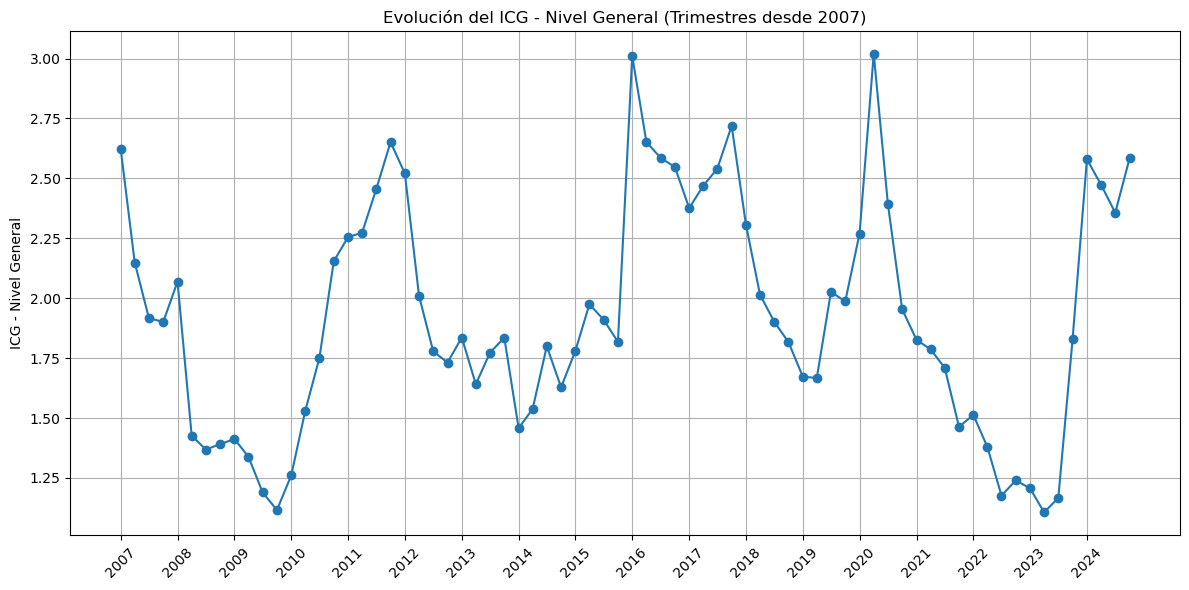

In [319]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Asegurarse de que la columna es datetime
tabla["indice_tiempo"] = pd.to_datetime(tabla["indice_tiempo"])

# Filas con enero
eneros = tabla[tabla["indice_tiempo"].dt.month == 1]["indice_tiempo"]

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(tabla["indice_tiempo"], tabla["icg_nivel_general"], marker='o', linestyle='-')
plt.xlabel("")
plt.ylabel("ICG - Nivel General")
plt.title("Evolución del ICG - Nivel General (Trimestres desde 2007)")

# Formatear el eje X para mostrar solo enero de cada año
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Un tick por año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Juan T\AppData\Local\Temp\ipykernel_12540\2104742388.py:39: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45, color='white')


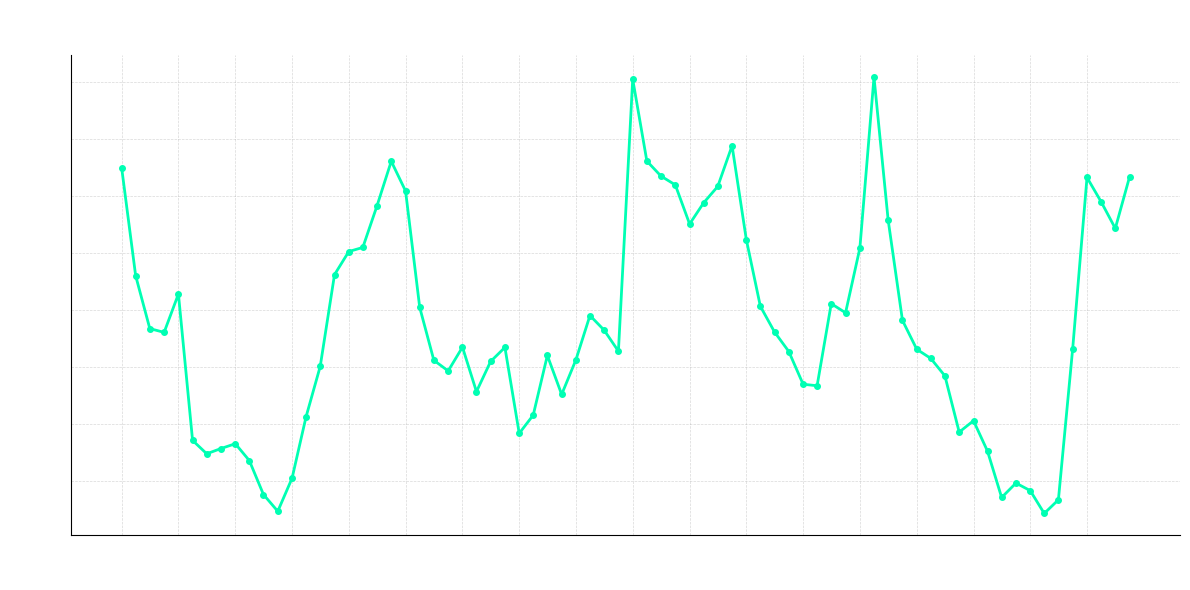

In [333]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Convertir a datetime
tabla["indice_tiempo"] = pd.to_datetime(tabla["indice_tiempo"])

# Filtrar sólo enero
eneros = tabla[tabla["indice_tiempo"].dt.month == 1]["indice_tiempo"]

# Crear gráfico
plt.figure(figsize=(12, 6), facecolor='none')  # Fondo transparente

# Gráfico principal
plt.plot(
    tabla["indice_tiempo"],
    tabla["icg_nivel_general"],
    color='#00FFB3',       # verde lima/celeste
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=4
)

# Estilo de ejes y fondo
ax = plt.gca()
ax.set_facecolor('none')   # Fondo transparente
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(colors='white')  # Ejes blancos

# Etiquetas
plt.ylabel("ICG - Nivel General", color='white', fontsize=12)
plt.title("Evolución del ICG - Nivel General\n(Trimestres desde 2007)", color='white', fontsize=14)

# Eje X: solo enero
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45, color='white')
plt.yticks(color='white')

# Grilla sutil
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig("grafico_icg.png", dpi=300, transparent=True)
plt.show()


C:\Users\Juan T\AppData\Local\Temp\ipykernel_12540\3974163620.py:35: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45, color='white')


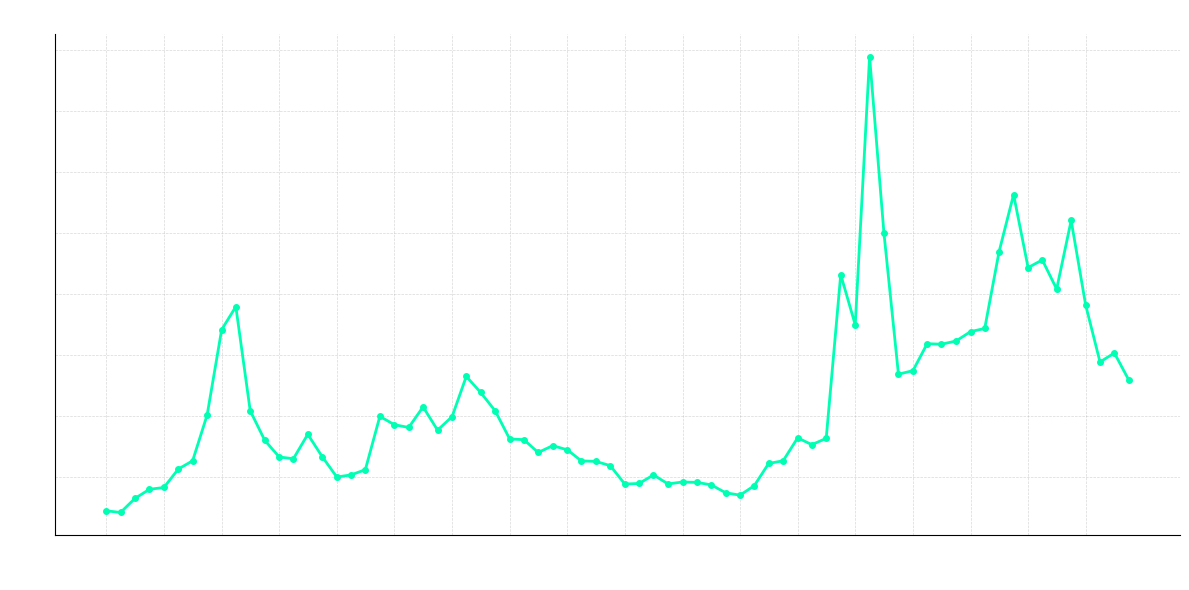

In [337]:
# Convertir a datetime
tabla["indice_tiempo"] = pd.to_datetime(tabla["indice_tiempo"])

# Filtrar sólo enero
eneros = tabla[tabla["indice_tiempo"].dt.month == 1]["indice_tiempo"]

# Crear gráfico
plt.figure(figsize=(12, 6), facecolor='none')  # Fondo transparente

# Gráfico principal
plt.plot(
    tabla["indice_tiempo"],
    tabla["Riesgo país"],
    color='#00FFB3',       # verde lima/celeste
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=4
)

# Estilo de ejes y fondo
ax = plt.gca()
ax.set_facecolor('none')   # Fondo transparente
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(colors='white')  # Ejes blancos

# Etiquetas
plt.ylabel("", color='white', fontsize=12)
plt.title("Riesgo País 2007-2024", color='white', fontsize=14)

# Eje X: solo enero
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45, color='white')
plt.yticks(color='white')

# Grilla sutil
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig("grafico_riesgopais.png", dpi=300, transparent=True)
plt.show()


C:\Users\Juan T\AppData\Local\Temp\ipykernel_12540\745133896.py:31: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45)


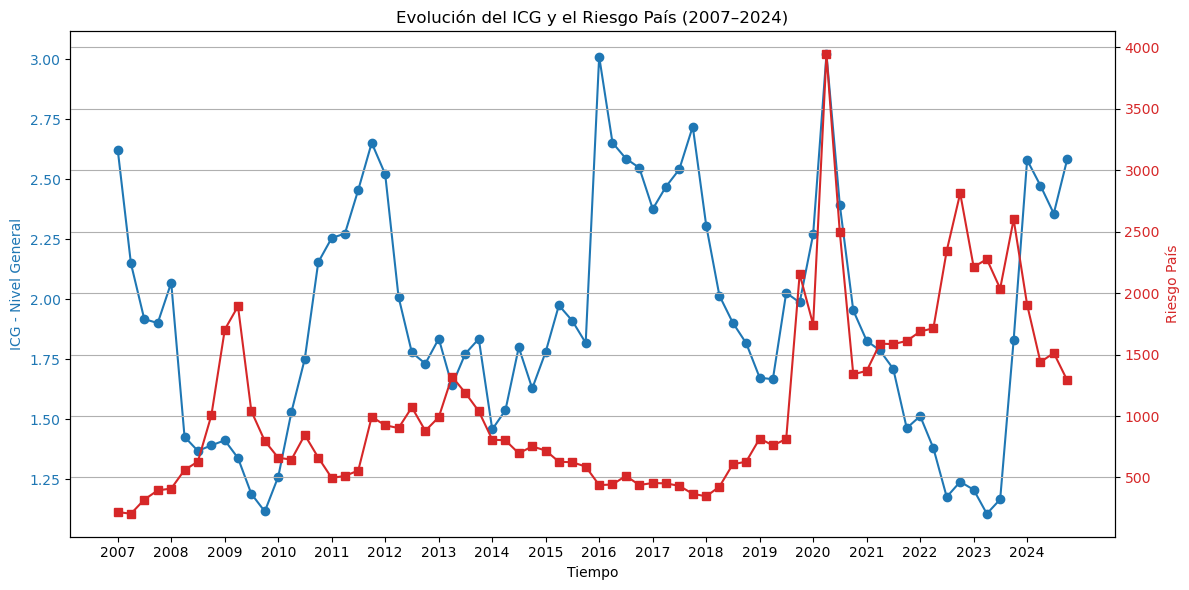

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Asegurarse de que la columna de fechas esté en formato datetime
tabla["indice_tiempo"] = pd.to_datetime(tabla["indice_tiempo"])

# Filas con enero para las etiquetas del eje X
eneros = tabla[tabla["indice_tiempo"].dt.month == 1]["indice_tiempo"]

# Crear figura y eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer eje Y: ICG - Nivel General
color1 = 'tab:blue'
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("ICG - Nivel General", color=color1)
ax1.plot(tabla["indice_tiempo"], tabla["icg_nivel_general"], color=color1, marker='o', label="ICG")
ax1.tick_params(axis='y', labelcolor=color1)

# Segundo eje Y: Riesgo País
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel("Riesgo País", color=color2)
ax2.plot(tabla["indice_tiempo"], tabla["Riesgo país"], color=color2, marker='s', label="Riesgo País")
ax2.tick_params(axis='y', labelcolor=color2)

# Formatear eje X para mostrar solo eneros
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(eneros.dt.to_pydatetime(), [d.strftime('%Y') for d in eneros], rotation=45)

# Título y layout
plt.title("Evolución del ICG y el Riesgo País (2007–2024)")
fig.tight_layout()
plt.grid(True)
plt.show()


In [203]:
# Correlación de Pearson
correlacion = tabla["icg_nivel_general"].corr(tabla["Riesgo país"])
print("Correlación de Pearson:", correlacion)


Correlación de Pearson: -0.20849560497740932


# Predicción para Riesgo País (y=Riesgo País)

In [216]:
tabla

,indice_tiempo,pib_precios_corrientes,pib_precios_2004,tcn_pesos_dolares,pib_dolares_precios_corrientes,poblacion,pib_per_capita_pesos_corrientes,pib_per_capita_dolares_corrientes,indice_precios_constantes,expectativa_inflacion_mediana,expectativa_inflacion_promedio,icg_nivel_general,evaluacion_general,interes_general,eficiencia,honestidad,capacidad,Riesgo país,Reservas_BCRA_millones
0,2007-01-01,774387.787841,576846.885699,3.096036,250122.351121,39335520.424390,19686.730453,6358.689256,121.465254,10.000000,13.763961,2.621915,2.813333,1.966667,2.253333,2.560000,3.516667,218.890000,32124
1,2007-04-01,904350.388093,674620.563006,3.082519,293380.346566,39437562.705194,22931.193666,7439.109479,141.685667,15.000000,15.441638,2.148999,2.160000,1.540000,1.756667,2.343333,2.943333,204.970000,36849
2,2007-07-01,914103.967402,610425.694015,3.137225,291373.379907,39539869.699085,23118.537678,7369.103189,127.871566,15.000000,20.898196,1.917331,1.810000,1.606667,1.600000,2.290000,2.620000,320.000000,43313
3,2007-10-01,995078.552951,625876.867864,3.145864,316313.284266,39642442.092770,25101.343419,7979.157377,130.769033,20.000000,25.225441,1.900817,1.863333,1.286667,1.470000,2.243333,2.633333,395.000000,42774
4,2008-01-01,1032356.873259,616720.357064,3.152572,327464.949353,39745280.574735,25974.325966,8239.090141,128.522489,20.000000,22.504985,2.068976,1.946667,1.360000,1.576667,2.450000,3.020000,410.000000,46292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-10-01,282103476.054208,696292.254849,446.752258,631453.946230,46757504.916269,6033330.404592,13504.868306,123.343608,100.000000,115.900000,1.830000,1.250000,1.936667,1.533333,2.266667,2.163333,2600.000000,26634
68,2024-01-01,418191840.950850,668672.713865,834.312456,501241.277080,46860655.890342,8924156.800738,10696.420431,118.190250,150.000000,230.000000,2.580000,2.256667,2.393333,2.416667,2.690000,3.153333,1906.000000,23470
69,2024-04-01,555062158.195852,720760.480106,885.913922,626541.861941,46964034.424108,11818877.253674,13340.886694,127.116515,70.000000,98.500000,2.473333,2.070000,2.130000,2.400000,2.846667,2.923333,1439.000000,27882
70,2024-07-01,635535679.664302,708557.001375,942.728261,674145.144517,47067641.019582,13502603.187610,14322.900615,124.689181,50.000000,80.600000,2.356667,2.026667,2.003333,2.220000,2.656667,2.880000,1513.000000,29615


## Modelo 1 (tipo de cambio)

In [218]:
y=tabla[["Riesgo país"]]
x=tabla[["tcn_pesos_dolares"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:            Riesgo país   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     7.008
Date:                Tue, 03 Jun 2025   Prob (F-statistic):             0.0109
Time:                        21:17:21   Log-Likelihood:                -398.94
No. Observations:                  50   AIC:                             801.9
Df Residuals:                      48   BIC:                             805.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1020.1132    113.07

## Modelo 2 (Tipo de cambio + indice de confianza)

In [222]:
y=tabla[["Riesgo país"]]
x=tabla[["tcn_pesos_dolares","icg_nivel_general"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:            Riesgo país   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     5.723
Date:                Tue, 03 Jun 2025   Prob (F-statistic):            0.00596
Time:                        21:17:58   Log-Likelihood:                -396.90
No. Observations:                  50   AIC:                             799.8
Df Residuals:                      47   BIC:                             805.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1797.2047    403.73

## Modelo 3 (tipo de cambio + icg + Reservas BCRA)

In [226]:
y=tabla[["Riesgo país"]]
x=tabla[["tcn_pesos_dolares","icg_nivel_general","Reservas_BCRA_millones"]]

In [228]:
y=tabla[["Riesgo país"]]
x=tabla[["tcn_pesos_dolares","icg_nivel_general","Reservas_BCRA_millones"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:            Riesgo país   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3.755
Date:                Tue, 03 Jun 2025   Prob (F-statistic):             0.0171
Time:                        21:20:01   Log-Likelihood:                -396.88
No. Observations:                  50   AIC:                             801.8
Df Residuals:                      46   BIC:                             809.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1919

## Modelo 4 (tipo de cambio + indice de confianza general + reservas bcra + exp. inflación promedio)

In [231]:
y=tabla[["Riesgo país"]]
x=tabla[["tcn_pesos_dolares","icg_nivel_general","Reservas_BCRA_millones","expectativa_inflacion_promedio"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:            Riesgo país   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     4.339
Date:                Tue, 03 Jun 2025   Prob (F-statistic):            0.00472
Time:                        21:21:40   Log-Likelihood:                -394.20
No. Observations:                  50   AIC:                             798.4
Df Residuals:                      45   BIC:                             808.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Modelo 5 (tipo de cambio + indice de confianza general + reservas bcra + exp. inflación promedio + PBI per capita en dolares corrientes)

In [236]:
y=tabla[["Riesgo país"]]
x=tabla[["tcn_pesos_dolares","icg_nivel_general","Reservas_BCRA_millones","expectativa_inflacion_promedio","pib_per_capita_dolares_corrientes"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:            Riesgo país   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.619
Date:                Tue, 03 Jun 2025   Prob (F-statistic):            0.00791
Time:                        21:24:16   Log-Likelihood:                -393.74
No. Observations:                  50   AIC:                             799.5
Df Residuals:                      44   BIC:                             811.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 